In [510]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Imputer

%matplotlib inline
# Global variables
BNB_LEMON = '#FFF44F'
BNB_ORANGE ='#FF4500'
BNB_GREEN = '#228B22'
BNB_BLUE = '#007A87'
BNB_RED = '#FF5A5F'
BNB_DARK_GRAY = '#565A5C'
BNB_LIGHT_GRAY = '#CED1CC'

In [511]:
df=pd.read_csv('/Users/shardul/Downloads/listings_detail.csv', low_memory=False)

#### Print all the features

In [512]:
list(df.columns.values)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [513]:
print(df.shape)

(44317, 96)


In [514]:
df['price'].value_counts()

$150.00      1881
$100.00      1832
$50.00       1443
$60.00       1397
$75.00       1321
$200.00      1306
$80.00       1233
$65.00       1141
$70.00       1122
$125.00      1016
$120.00      1013
$90.00        949
$250.00       901
$55.00        877
$85.00        846
$45.00        814
$99.00        754
$110.00       726
$95.00        713
$175.00       694
$40.00        652
$130.00       563
$140.00       499
$300.00       490
$180.00       476
$160.00       464
$115.00       451
$225.00       433
$199.00       384
$69.00        381
             ... 
$368.00         1
$775.00         1
$541.00         1
$720.00         1
$1,095.00       1
$6,000.00       1
$655.00         1
$985.00         1
$3,620.00       1
$4,700.00       1
$231.00         1
$785.00         1
$769.00         1
$3,750.00       1
$5.00           1
$640.00         1
$582.00         1
$2,900.00       1
$4,500.00       1
$618.00         1
$858.00         1
$505.00         1
$1,595.00       1
$1,080.00       1
$685.00   

In [515]:
print ('Number of entries: ', df.shape[0])

Number of entries:  44317


### Visualizing prices

In [516]:
def plot_hist(n, titles, ranges):
    fig, ax = plt.subplots(n, figsize = (8, 10.5))
    for i in range(n):
        d, bins, patches = ax[i].hist(ranges[i], 50, normed = 1, color= BNB_GREEN, alpha = 0.85)
        ax[i].set_title(titles[i])
        ax[i].set_xlabel("Daily Listing Price in Dollars", fontsize=20)
        ax[i].set_ylabel("Frequency", fontsize=20)
    plt.tight_layout()
    plt.show()

In [517]:
#Visualize price table, changing them to floats and replacing the commas with a blank
#prices = df['price'].apply((lambda s: float(s[1:].replace(',',''))))
prices = df['price'].apply(lambda x:float(str(x).replace(',','').replace('$','')))

C:\Users\shahk\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\shahk\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\shahk\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


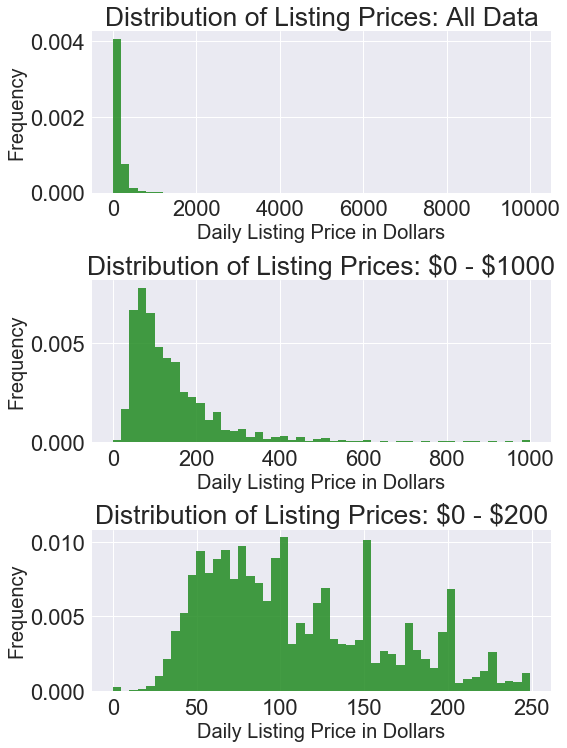

In [518]:
plot_hist(3, ['Distribution of Listing Prices: All Data', 'Distribution of Listing Prices: \$0 - \$1000', 
               'Distribution of Listing Prices: \$0 - \$200'], [prices, prices[prices <= 1000], prices[prices < 250]])

In [519]:
# Get frequency of bedroom number for listings
bedrooms_counts = Counter(df.bedrooms)
tdf = pd.DataFrame.from_dict(bedrooms_counts, orient = 'index').sort_values(by = 0)
tdf = (tdf.iloc[-10:, :] / 27392) * 100

In [520]:
# Sort bedroom dataframe by number
tdf.sort_index(axis = 0, ascending = True, inplace = True)

#### Plot the percentage of listings by bedroom number

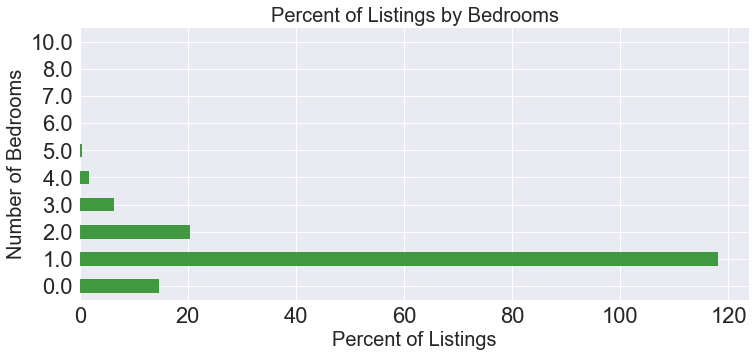

Percent of 1 Bedroom Listings: %117.99


In [521]:
# Plot percent of listings by bedroom number
ax = tdf.plot(kind = 'barh', figsize = (12, 5), color = BNB_GREEN, alpha = 0.85)
ax.set_xlabel("Percent of Listings", fontsize=20)
ax.set_ylabel("Number of Bedrooms", fontsize=20)
ax.set_title('Percent of Listings by Bedrooms', fontsize=20)
ax.legend_.remove()

plt.show()

print ("Percent of 1 Bedroom Listings: %{0:.2f}".format(tdf[0][1]))

#### Plot listings on scatterplot by using Latitude and Longitude

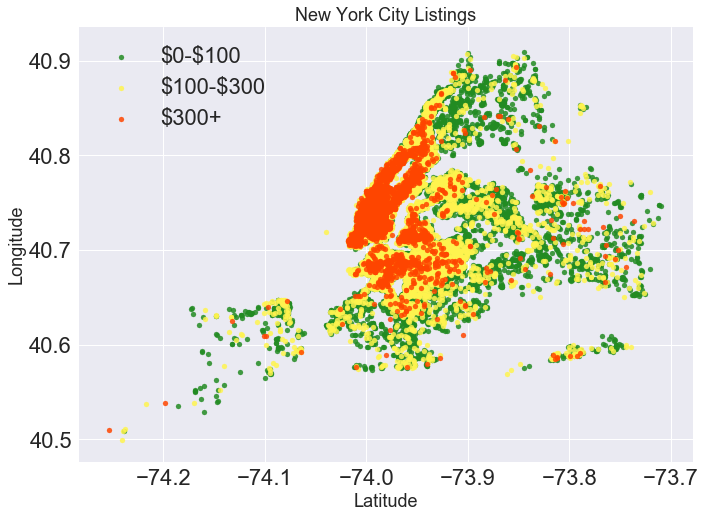

In [522]:
# Outline price buckets
intervals = [0,100,300, 10000] 
leg_labels = []

# Get Labels for legend
for i in range(0,len(intervals) - 1):
    if i == len(intervals) - 2:
        leg_labels.append('\${}+'.format(intervals[i]))
    else:
        leg_labels.append("\${}-\${}".format(intervals[i], intervals[i+1]))    

buckets = []

# Divide up into price buckets
for i in range(0, len(intervals) - 1):
    buckets.append(df[(prices > intervals[i]) & (prices < intervals[i+1])])

colors = [BNB_GREEN, BNB_LEMON, BNB_ORANGE]
alphas = [0.85, 0.85, 0.85]  

# Plot listings on scatterplot
plt.figure(figsize=(11,8))
for i in range(0, len(buckets)):
     plt.scatter(buckets[i]['longitude'], buckets[i]['latitude'], alpha = alphas[i], c=colors[i], s=25)
    
plt.title('New York City Listings', fontsize=18)
plt.xlabel('Latitude', fontsize=18)
plt.ylabel('Longitude', fontsize=18)
plt.legend(labels=leg_labels, loc = 'best')
#plt.xlim(-74.2,-73.7)
#plt.ylim(40.45,40.95)

plt.show()

#### Plot emptiness graph

In [523]:
def percent_empty(df):
    
    bools = df.isnull().tolist()
    percent_empty = float(bools.count(True)) / float(len(bools))
    
    return percent_empty, float(bools.count(True))

In [524]:
# Store emptiness for all features
emptiness = []

missing_columns = []

# Get emptiness for all features
for i in range(0, df.shape[1]):
    p, n = percent_empty(df.iloc[:,i])
    if n > 0:
        missing_columns.append(df.columns.values[i])
    emptiness.append(round((p), 2))
    
empty_dict = dict(zip(df.columns.values.tolist(), emptiness))


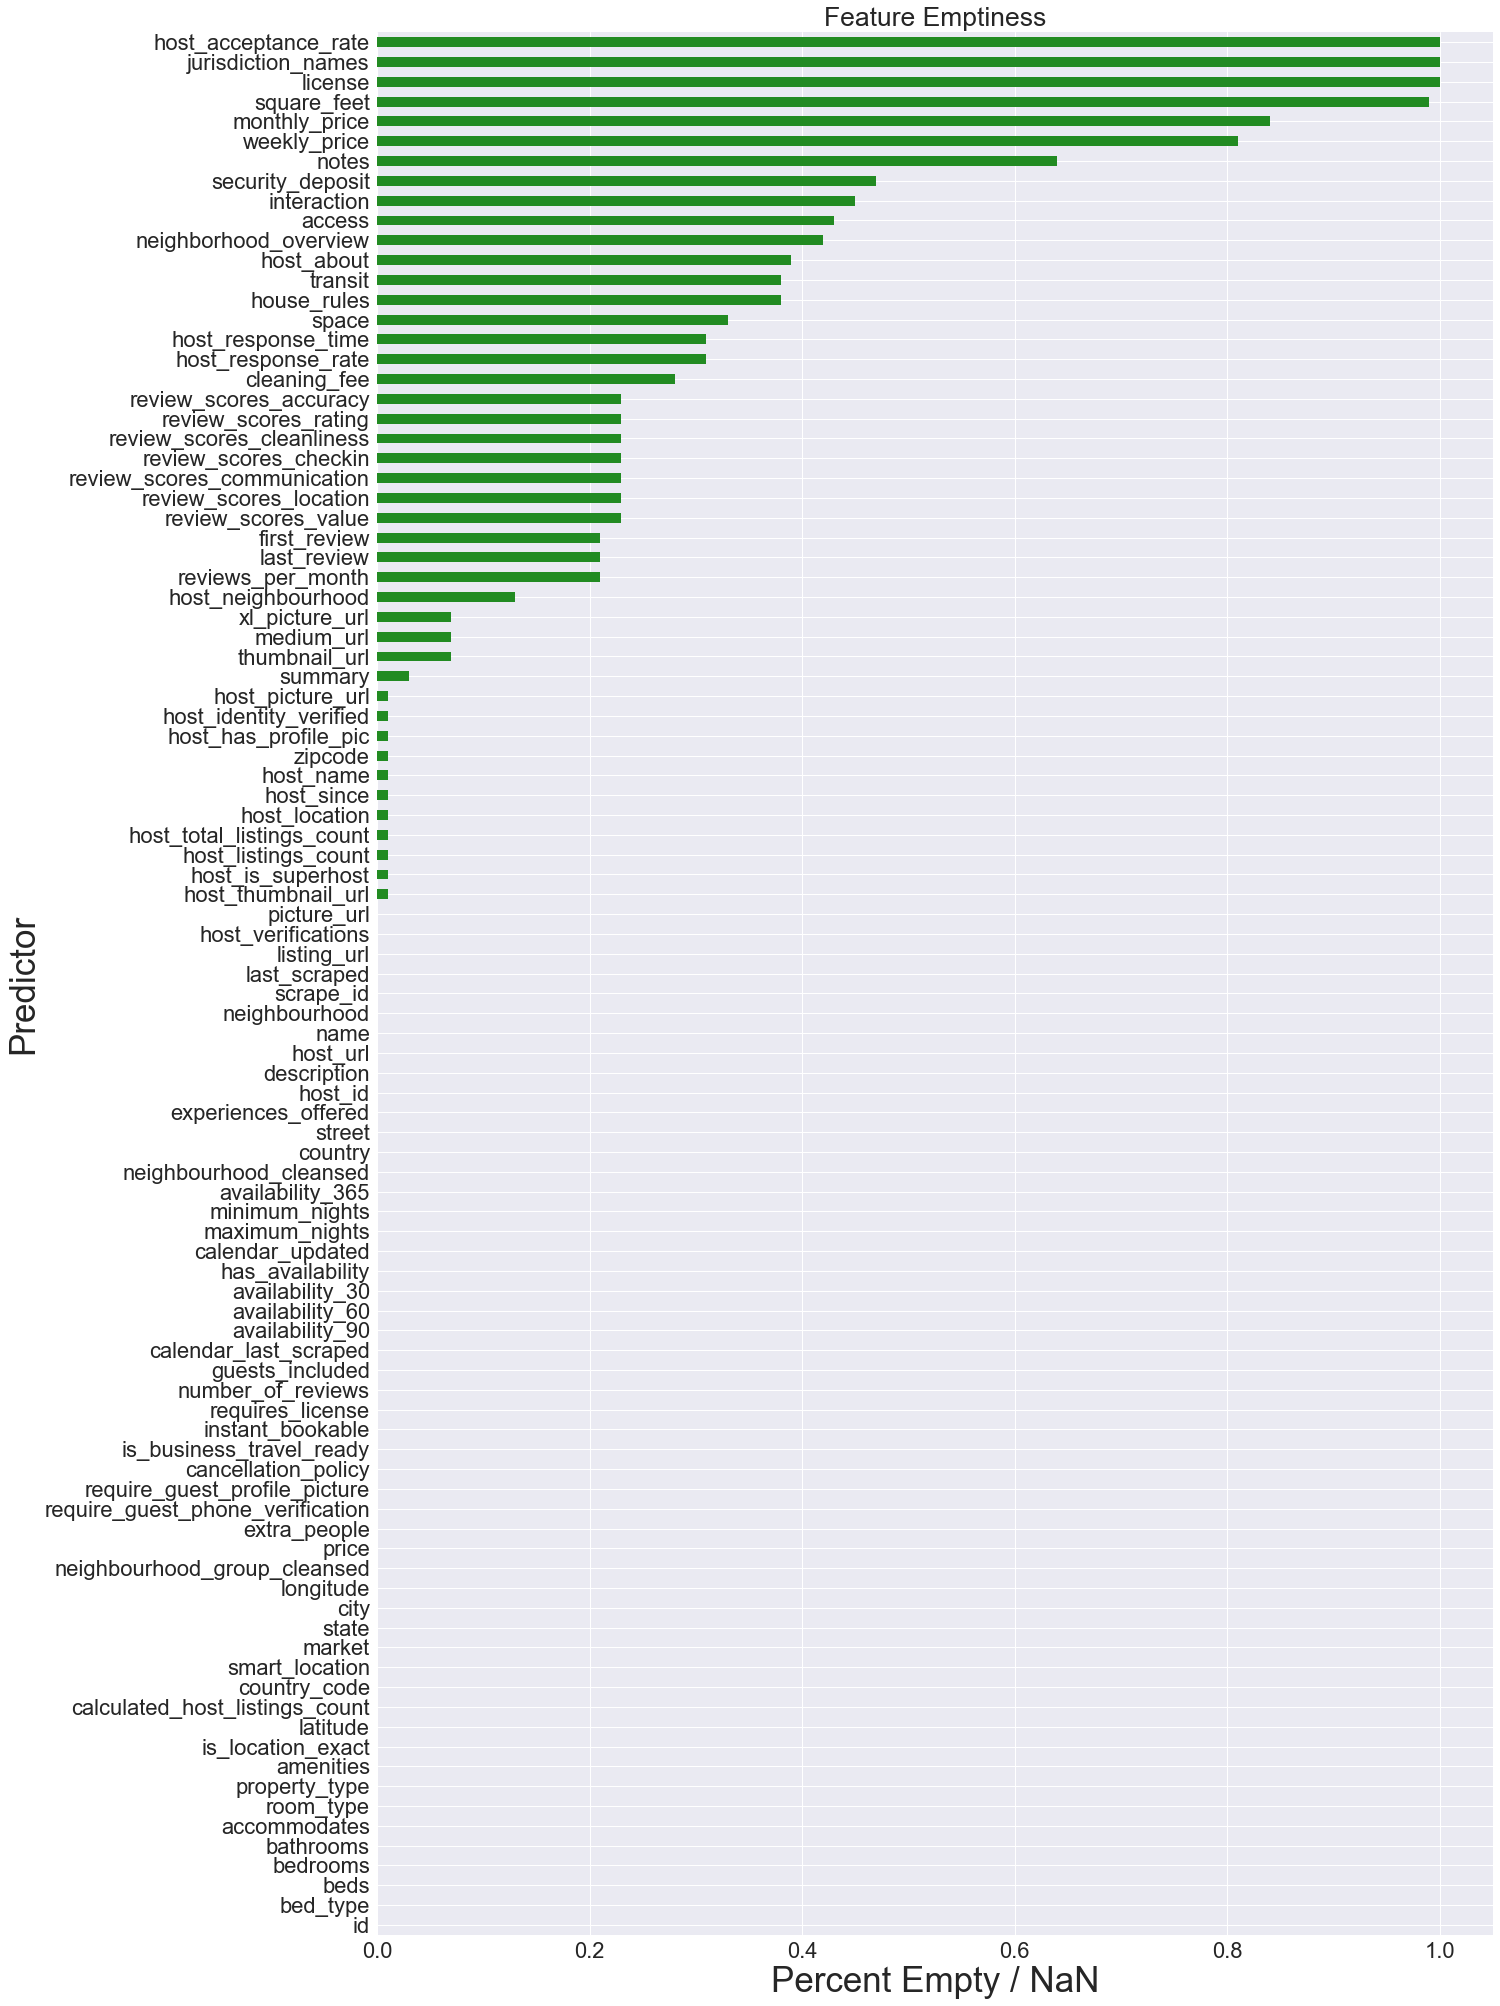

In [525]:
# Plot emptiness graph
empty = pd.DataFrame.from_dict(empty_dict, orient = 'index').sort_values(by=0)
ax = empty.plot(kind = 'barh', color = BNB_GREEN, figsize = (20, 35))
ax.set_xlabel('Percent Empty / NaN', fontsize = 35)
ax.set_ylabel('Predictor', fontsize = 35)
ax.set_title('Feature Emptiness')
ax.legend_.remove()

plt.show()

### Defining a function to convert "categorical" feature to "numerical" feature


In [526]:
print(df['amenities'].head())

0    {TV,"Wireless Internet","Air conditioning",Kit...
1    {"Wireless Internet","Air conditioning",Kitche...
2    {TV,Internet,"Wireless Internet","Air conditio...
3                                                   {}
4    {TV,"Cable TV",Internet,"Wireless Internet","A...
Name: amenities, dtype: object


In [527]:
y=0
for x in df['amenities']:
    if 'TV' in x:
        df.loc[y,'tv']='1'
        y+=1
    else:
        df.loc[y,'tv']='0'
        y+=1


In [528]:

y=0
for x in df['amenities']:
    if 'Wireless Internet' in x:
        df.loc[y,'Wireless_Internet']='1'
        y+=1
    else:
        df.loc[y,'Wireless_Internet']='0'
        y+=1

In [529]:
y=0
for x in df['amenities']:
    if 'Free parking on premises' in x:
        df.loc[y,'Parking']='1'
        y+=1
    else:
        df.loc[y,'Parking']='0'
        y+=1

In [530]:
y=0
for x in df['amenities']:
    if 'Pool' in x:
        df.loc[y,'Pool']='1'
        y+=1
    else:
        df.loc[y,'Pool']='0'
        y+=1

In [531]:
y=0
for x in df['amenities']:
    if 'Kitchen' in x:
        df.loc[y,'Kitchen']='1'
        y+=1
    else:
        df.loc[y,'Kitchen']='0'
        y+=1

In [532]:
pd.to_numeric(df.tv)
pd.to_numeric(df.Wireless_Internet)
pd.to_numeric(df.Parking)
pd.to_numeric(df.Pool)
pd.to_numeric(df.Kitchen).head()

0    1
1    1
2    1
3    0
4    1
Name: Kitchen, dtype: int64

In [533]:
df['Pool'] = df['Pool'].astype(float)
df['Parking'] = df['Parking'].astype(float)
df['Kitchen'] = df['Kitchen'].astype(float)
df['Wireless_Internet'] = df['Wireless_Internet'].astype(float)
df['tv'] = df['tv'].astype(float)

In [534]:
df['extra_people']=df['extra_people'].apply(lambda x: x.replace('$',''))
df['extra_people']=df['extra_people'].apply(lambda x:x.replace(',',''))
df['extra_people'] = df['extra_people'].astype(float)

In [535]:
df['price']=df['price'].apply(lambda x: x.replace('$',''))
df['price']=df['price'].apply(lambda x:x.replace(',',''))
df['price']=df['price'].astype(float)

In [536]:
 #df = df.replace(np.nan, 0)

In [537]:
# create a python list of feature names that would like to pick from the dataset:
feature_cols = ['bathrooms','bedrooms','beds',
                'extra_people','tv',
                'Parking','Pool','Kitchen',
                'latitude','longitude', 'Wireless_Internet']
#'host_response_rate','host_identity_verified','city','property_type', 'room_type', bed_type','cancellation_policy', 
#'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'security_deposit',
# 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value','number_of_reviews',  
#                 'availability_30', 'availability_60', 'availability_90', 'availability_365','accommodates',
 

In [538]:
featured_matrix=df[feature_cols]

In [539]:
featured_matrix.bathrooms.fillna(1).head()

0    1.0
1    1.0
2    1.0
3    1.0
4    3.0
Name: bathrooms, dtype: float64

In [540]:
featured_matrix['bedrooms'].fillna(1).head()

0    0.0
1    1.0
2    1.0
3    1.0
4    3.0
Name: bedrooms, dtype: float64

#### Filtering the dataset

In [541]:
label_vector =df[df['price']<=500]
featured_matrix=df[df['price']<=500]

In [542]:
df1 =df[(df.price<=500)]


In [543]:
featured_matrix = df1[feature_cols]


In [544]:
label_vector= df1['price']

In [545]:
featured_matrix.shape

(43454, 11)

In [546]:
featured_matrix[featured_matrix['bathrooms'].isnull()].head()

,bathrooms,bedrooms,beds,extra_people,tv,Parking,Pool,Kitchen,latitude,longitude,Wireless_Internet
176,NaN,1.0,1.0,25.0,1.0,0.0,0.0,1.0,40.782069,-73.915826,1.0
552,NaN,1.0,2.0,26.0,1.0,0.0,0.0,0.0,40.762908,-73.918715,1.0
788,NaN,3.0,1.0,25.0,1.0,1.0,0.0,1.0,40.762162,-73.925417,1.0
878,NaN,1.0,1.0,0.0,1.0,0.0,0.0,1.0,40.759579,-73.914171,1.0
1437,NaN,1.0,1.0,0.0,1.0,0.0,0.0,0.0,40.710777,-74.016233,1.0


In [547]:
featured_matrix.bathrooms=featured_matrix.bathrooms.fillna(1)

C:\Users\shahk\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [548]:
featured_matrix.beds=featured_matrix.beds.fillna(1)

C:\Users\shahk\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [549]:
featured_matrix.bedrooms=featured_matrix.bedrooms.fillna(1)

C:\Users\shahk\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [550]:
X = featured_matrix
y=label_vector

In [551]:
import seaborn as sns
import matplotlib.pyplot as plt

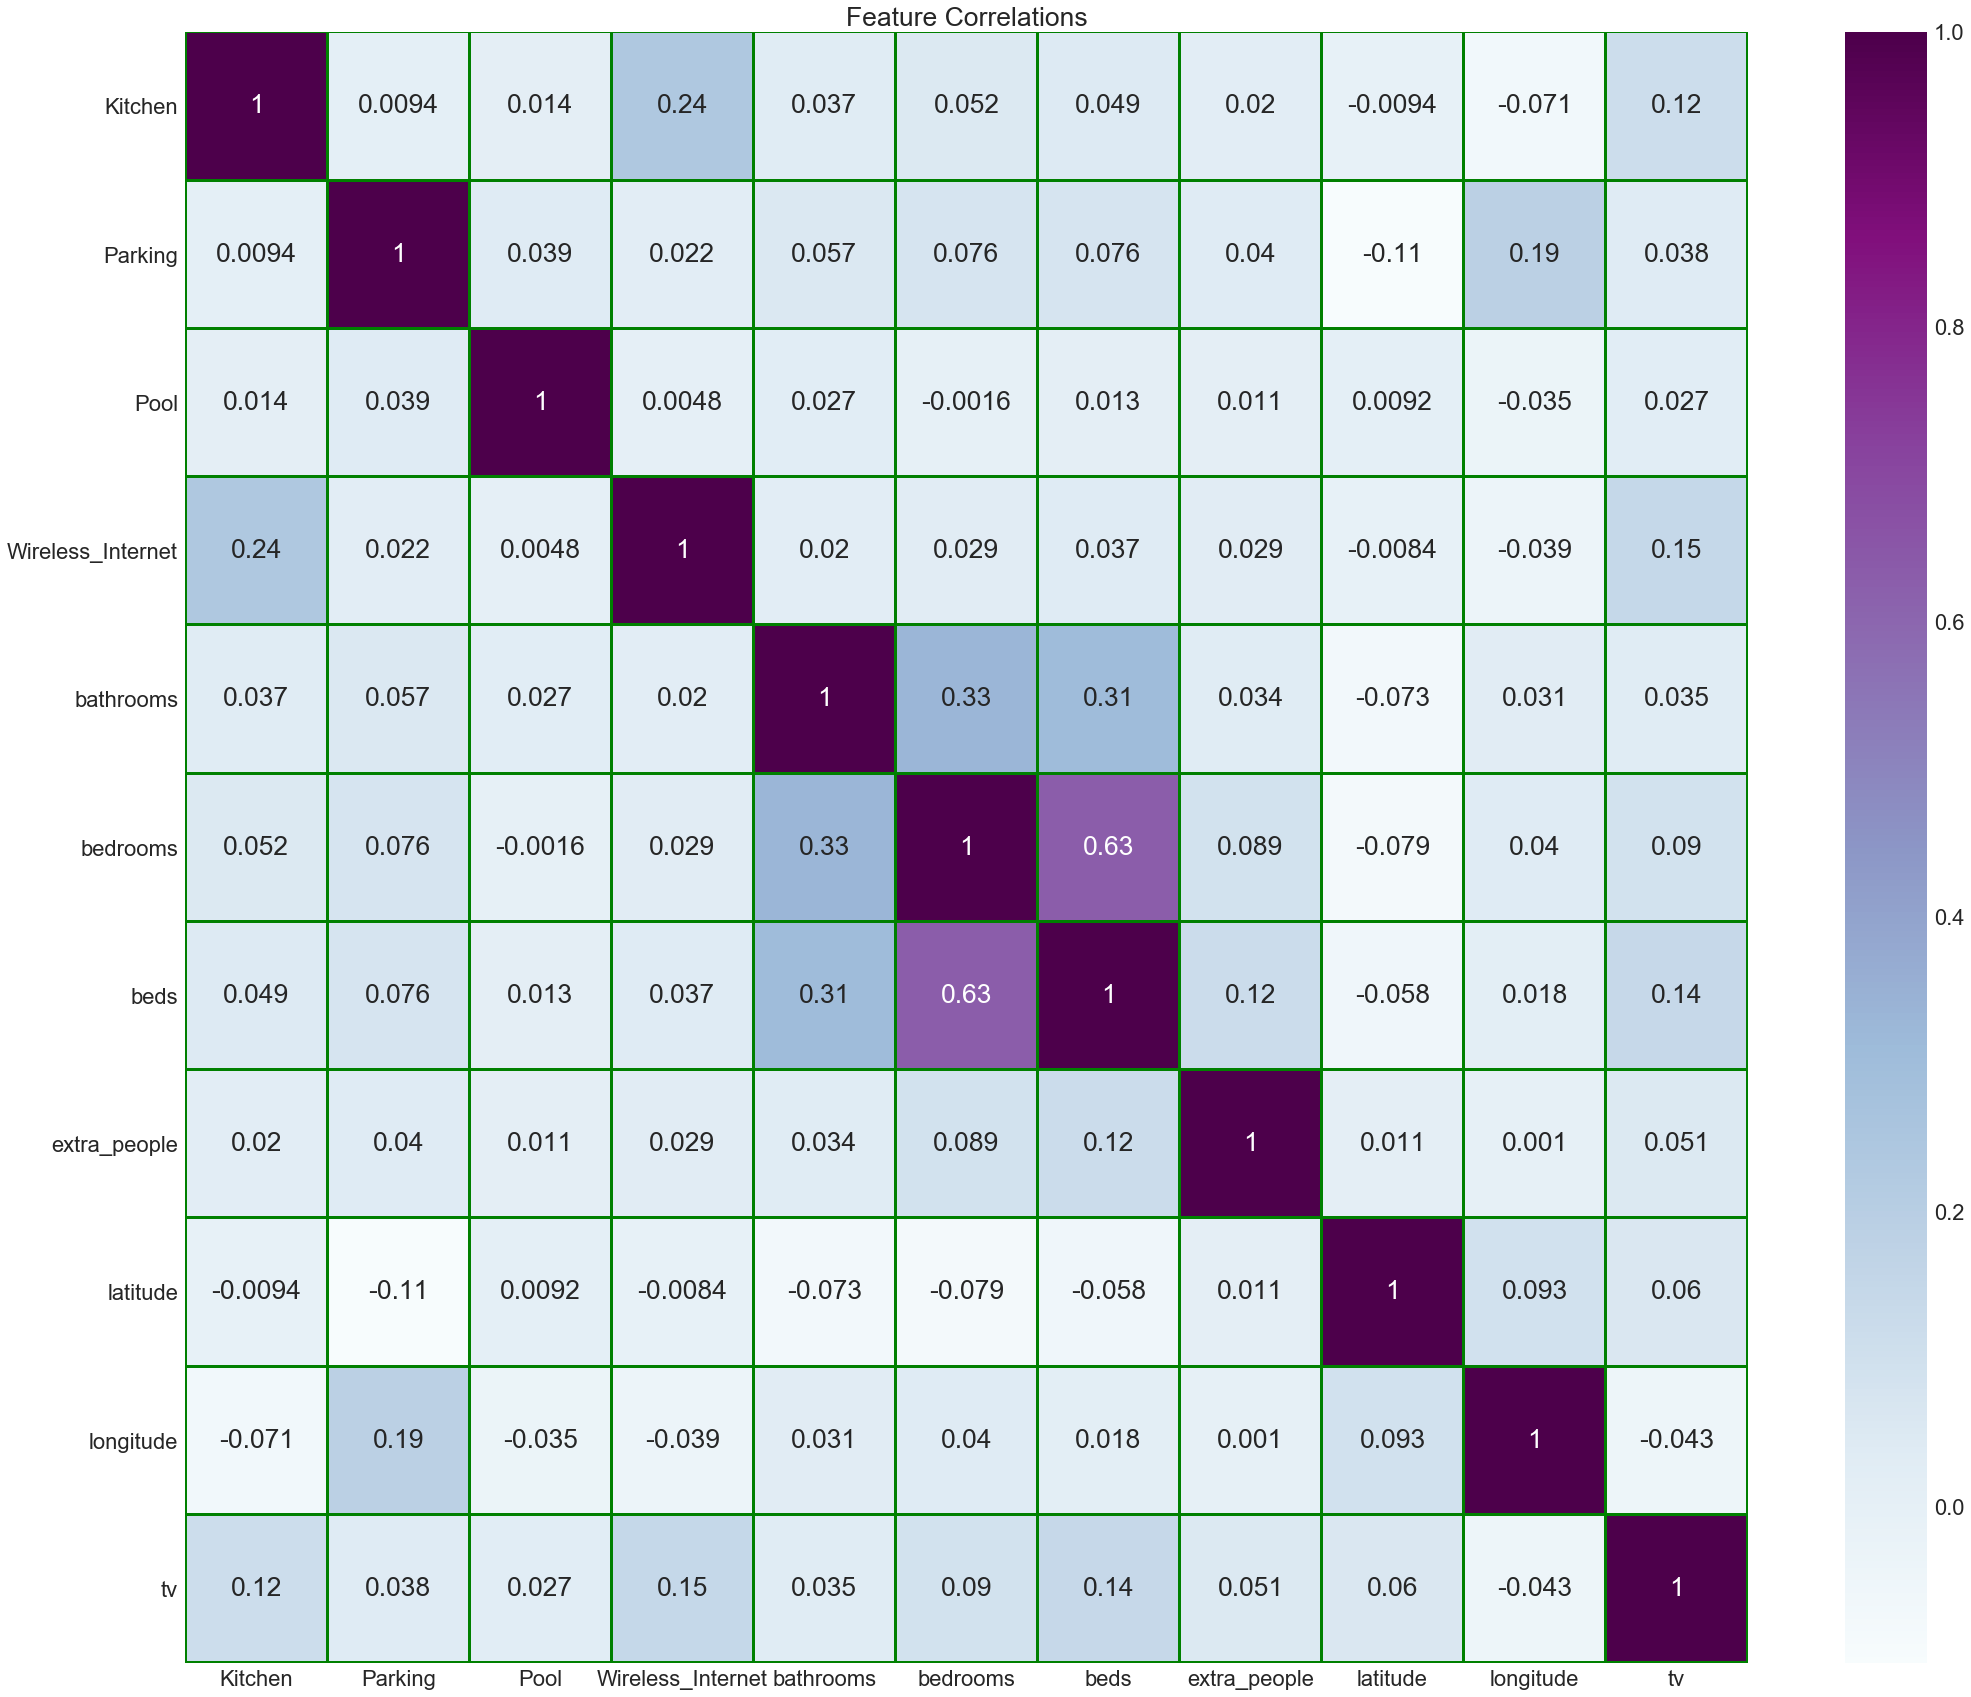

In [552]:
#new = new.convert_objects(convert_numeric=True)
sns.set(font_scale=2.2)
str_list = []
for colname, colvalue in featured_matrix.iteritems():
    if type(colvalue)==str:
        str_list.append(colname)

num_list = featured_matrix.columns.difference(str_list)

house_num = featured_matrix[num_list]

f,ax = plt.subplots(figsize = (35,30))

plt.title('Feature Correlations')


sns.heatmap(house_num.astype(float).corr(),linewidths=2.0,vmax=1.0, square = False,
            cmap = 'BuPu',linecolor = 'G', annot = True)

plt.show()

## Step3: Defining (instantiating) an "object" from the sklearn class:
#### Splitting the Dataset:

In [553]:
# Randomly splitting the original dataset into training set and testing set:
X_train, X_test, y_train, y_test = train_test_split(featured_matrix, label_vector, test_size=0.2, random_state=3)

# print the size of the traning set:
print(X_train.shape)
print(y_train.shape)

# print the size of the testing set:
print(X_test.shape)
print(y_test.shape)

(34763, 11)
(34763,)
(8691, 11)
(8691,)


# ANN Regression
#### Defining (instantiating) an "object" from the sklearn class "MLPRegressor" (Multi-layer Perceptron (MLP)):

In [554]:
# "my_ANN" is instantiated as an "object" of MLPRegressor "class". 

my_ANN = MLPRegressor(hidden_layer_sizes=(6,4,),  activation='relu', solver='adam', alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True,
    random_state=2, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)


#### Training Stage: Training a predictive model using the training dataset:


In [555]:
# Training ONLY on the training set:
my_ANN.fit(X_train, y_train)


C:\Users\shahk\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(6, 4), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=2, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [556]:
# Weights:
print(my_ANN.coefs_)
# The ith element in the list represents the weight matrix corresponding to layer i.

print('\n')

# Bias weights:
print(my_ANN.intercepts_)
# The ith element in the list represents the bias vector corresponding to layer i + 1.

[array([[-1.23473416e-001,  1.83786130e+000,  1.53440000e+000,
        -1.69735444e-001,  1.59760168e-316, -2.62407563e-316],
       [ 3.45710304e+000,  1.17653585e+000,  4.78817137e+000,
        -2.36429696e+000,  1.66818731e-316,  1.23337871e-316],
       [ 2.87362374e+000,  1.86958212e-001,  9.71680415e-001,
         4.88818326e+000,  2.05291736e-316,  4.26192508e-316],
       [ 3.41200593e-001, -5.44338322e-002,  1.96106347e-002,
        -3.03398742e+000,  2.08852739e-305,  4.06863534e-316],
       [ 2.57778162e+000,  5.17914374e+000,  2.83082656e+000,
         3.30520524e+000,  1.71327337e-316, -3.83723500e-316],
       [-2.90760538e+000, -4.44019539e+000, -2.91882259e+000,
        -1.41415455e+000,  3.79942855e-317, -4.47133214e-316],
       [ 2.73457207e+000,  3.33332091e+000,  2.78621504e+000,
         2.50870869e+000,  2.76414082e-316, -3.82659085e-316],
       [ 2.28787053e+000,  1.14407205e+000,  1.29869423e+000,
        -8.14019132e-002,  4.76858604e-316, -3.22732805e-316],

#### Testing (Prediction) Stage: Making prediction on new observations (Testing Data) using the trained model:


In [557]:
# Testing on the testing set:
y_predict_ann = my_ANN.predict(X_test)
print(y_predict_ann)

[116.67511436 124.49450205  84.84684553 ... 272.02334104 219.3995328
 211.28890693]


### Accuracy Evaluation:


In [558]:
from sklearn import metrics

# Calculating "Mean Square Error" (MSE):
mse = metrics.mean_squared_error(y_test, y_predict_ann)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse = np.sqrt(mse)

print('RSME:',rmse)

mape = np.mean(np.abs((y_test - y_predict_ann) / y_test)) * 100
print('MAPE:',mape)

RSME: 69.6475879521891
MAPE: inf


# Random Forest Regressor
#### Defining (instantiating) an "object" from the sklearn class "RandomForestRegressor":

In [559]:
my_RF = RandomForestRegressor(n_estimators = 19, bootstrap = True, random_state=2)

#### Training Stage: Training a predictive model using the training dataset:


In [560]:
# Training ONLY on the training set:
my_RF.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=19, n_jobs=None,
           oob_score=False, random_state=2, verbose=0, warm_start=False)

In [561]:
# Testing on the testing set:

y_predict_RF = my_RF.predict(X_test)

print(y_predict_RF)

[ 83.78947368 103.89473684  55.         ... 400.10526316 223.68421053
 238.57894737]


### Accuracy Evaluation:


In [562]:
from sklearn import metrics

# Calculating "Mean Square Error" (MSE):
mse = metrics.mean_squared_error(y_test, y_predict_RF)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse = np.sqrt(mse)

print('RSME:',rmse)

mape = np.mean(np.abs((y_test - y_predict_RF) / y_test)) * 100
print('MAPE:',mape)

RSME: 60.526403586381385
MAPE: inf


# Linear Regression
#### Defining (instantiating) an "object" from the sklearn class "LinearRegression":

In [563]:
my_linear = LinearRegression()
my_linear.fit(featured_matrix, label_vector)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [564]:
print(my_linear.intercept_)

print(my_linear.coef_)
coef_list = my_linear.coef_

print(coef_list)

-53487.19057790303
[ 1.09888722e+01  2.09956195e+01  2.66641456e+01  1.61412047e-01
  3.24877870e+01 -9.18918204e+00  3.17822100e+01  2.89847798e+00
  1.80767411e+02 -6.24289520e+02 -1.66770421e+01]
[ 1.09888722e+01  2.09956195e+01  2.66641456e+01  1.61412047e-01
  3.24877870e+01 -9.18918204e+00  3.17822100e+01  2.89847798e+00
  1.80767411e+02 -6.24289520e+02 -1.66770421e+01]


In [565]:
my_linear.fit(X_train, y_train)
y_predict_ln = my_linear.predict(X_test)
print(y_predict_ln)

[ 87.05793791 117.65949843  91.30419986 ... 286.77306992 177.97471454
 196.785494  ]


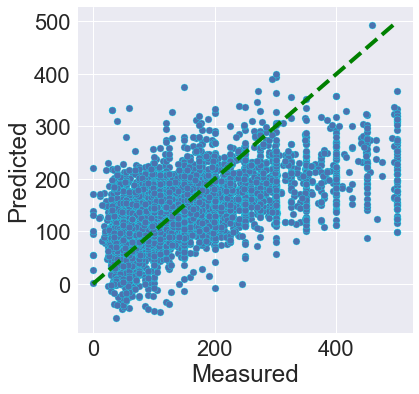

In [566]:

y_predict_ln = my_linear.predict(X_test)
fig, ax = plt.subplots(figsize = (6,6))
ax.scatter(y_test, y_predict_ln, edgecolors=(0,1,1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'g--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### Accuracy Evaluation:


In [567]:
from sklearn import metrics

# Calculating "Mean Square Error" (MSE):
mse = metrics.mean_squared_error(y_test, y_predict_ln)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse = np.sqrt(mse)

print('RSME:',rmse)

mape = np.mean(np.abs((y_test - y_predict_ln) / y_test)) * 100
print('MAPE:',mape)

RSME: 68.77791535048544
MAPE: inf


# Polynomial Regressor
#### Defining (instantiating) an "object" from the sklearn class "PolynomialRegressor":

In [568]:

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

poly_lin_reg = LinearRegression()
poly_lin_reg.fit(X_train_poly, y_train)
y_predict_poly = poly_lin_reg.predict(X_test_poly)
print(y_predict_poly)

[ 77.99806846 113.59000124  78.60472187 ... 343.00368646 184.86435563
 225.98875121]


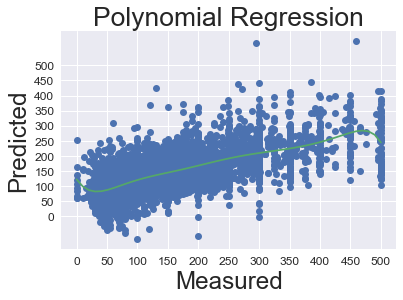

In [570]:
z = np.polyfit(y_test,y_predict_poly,10) 

p = np.poly1d(z)

plt.title ('Polynomial Regression')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.yticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
            ['0','50','100', '150', '200', '250', '300',  '350', '400', '450', '500'], fontsize = 12)
plt.xticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
            ['0','50','100', '150', '200', '250', '300',  '350', '400', '450', '500'],
            fontsize = 12)

#plt.plot(y_test[:100], y_predict_poly[:100],'o-')
#plt.plot(y_test[:5], y_predict_poly[:5], '-')

datax_os = np.linspace(y_test.min(), y_test.max(), 50 )
#plt.figure(figsize=(18,18))
plt.plot(y_test, y_predict_poly, 'o',datax_os, p(datax_os)) # 'smoother' line

plt.show()

### Accuracy Evaluation:


In [571]:
from sklearn import metrics

# Calculating "Mean Square Error" (MSE):
mse = metrics.mean_squared_error(y_test, y_predict_poly)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse = np.sqrt(mse)

print('RSME:',rmse)

mape = np.mean(np.abs((y_test - y_predict_poly) / y_test)) * 100
print('MAPE:',mape)

RSME: 62.754808865060085
MAPE: inf


# Logistic Regression
#### Defining (instantiating) an "object" from the sklearn class "LogisticRegression":

In [572]:
my_logreg = LogisticRegression()


In [573]:
my_logreg.fit(X, y)

C:\Users\shahk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shahk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [574]:
y_predict_log = my_logreg.predict(X_test)

print(y_predict_log)

[ 50. 150. 150. ... 200. 150. 200.]


### Accuracy Evaluation:


In [575]:
from sklearn import metrics

# Calculating "Mean Square Error" (MSE):
mse = metrics.mean_squared_error(y_test, y_predict_log)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse = np.sqrt(mse)

print('RSME:',rmse)

mape = np.mean(np.abs((y_test - y_predict_log) / y_test)) * 100
print('MAPE:',mape)

RSME: 76.07086834459513
MAPE: inf


#  
#  Finding the best  features
#  

In [576]:
from sklearn.metrics import matthews_corrcoef


In [577]:
feature_cols = ['bathrooms','bedrooms','beds',
                'extra_people','tv',
                'Parking','Pool','Kitchen',
                'latitude','longitude', 'Wireless_Internet']
#'host_response_rate','host_identity_verified','city','property_type', 'room_type', bed_type','cancellation_policy', 
#'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'security_deposit',
# 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value','number_of_reviews',  
#                 'availability_30', 'availability_60', 'availability_90', 'availability_365','accommodates',
 

In [578]:
a = []
for f in feature_cols:
    a.append(np.abs(np.corrcoef(X[f],y)[1,0]))
        
a.sort()
print(a)

[0.022815068893487448, 0.05458636061674697, 0.05860176788993052, 0.06650311883462999, 0.06825097926086772, 0.10258634193762302, 0.18187474088818786, 0.25657787089209516, 0.29732385628334373, 0.3638370873165327, 0.43421315828514273]


In [579]:
count = 1
for f in feature_cols:
    if np.abs(np.corrcoef(X[f],y)[1,0]):
        #print(f)
        print(count , '-' , f  , '=' ,  np.abs(np.corrcoef(X[f],y)[1,0]))
        count = count + 1

1 - bathrooms = 0.18187474088818786
2 - bedrooms = 0.3638370873165327
3 - beds = 0.43421315828514273
4 - extra_people = 0.10258634193762302
5 - tv = 0.25657787089209516
6 - Parking = 0.05458636061674697
7 - Pool = 0.05860176788993052
8 - Kitchen = 0.06825097926086772
9 - latitude = 0.06650311883462999
10 - longitude = 0.29732385628334373
11 - Wireless_Internet = 0.022815068893487448
